In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
#provides nice graphs

observations = 1000
#Creating two variable linear model

xs = np.random.uniform(low = -10,high = 10,size = (observations,1))
zs = np.random.uniform(-10,10,(observations,1))

# Helps the data getting into a stack and results in the matrix as 1000 by 2
inputs = np.column_stack((xs,zs))

print(inputs.shape)

(1000, 2)


In [2]:
# CREATING THE TARGETS WE AIM AT
# real equations or targets have noise in them and hence it yeilds to a better result including it 
noise = np.random.uniform(-1,1,(observations,1))

targets = 2*xs - 3*zs + 5 + noise
print(targets.shape)

(1000, 1)


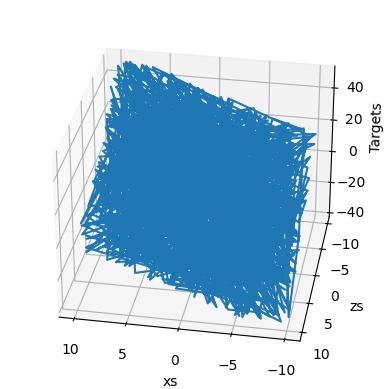

In [3]:
# PLOT THE TRAINING DATA


# In order to use the 3D plot, the objects should have a certain shape, so we reshape the targets.
# The proper method to use is reshape and takes as arguments the dimensions in which we want to fit the object.
targets = targets.reshape (observations,1)
# Plotting according to the conventional matplotlib.pyplot syntax
# Declare the figure
fig = plt.figure()
# A method allowing us to create the 3D plot
ax = fig.add_subplot (111, projection='3d')
# Choose the axes
ax.plot(xs, zs, targets)
# Set Labels
ax.set_xlabel ('xs')
ax. set_ylabel ('zs')
ax.set_zlabel ('Targets')
# You can Aidle with the azim parameter to plot the data from different angles. Just change the value of azin-100
# to azim = 0; azim = 200, or whatever. Check and see what happens
ax.view_init(azim=100)
# So far we were just describing the plot. This method actually shows the plot.
plt.show()
targets = targets.reshape(observations,1)

In [4]:
# Just like the gradient descent we havr to find the arbitary number to start with and then proceed
#size will 2,1 as it is a 2,1 vector that we will make use of 
#No of biases depedns on the number of the outputs 
init_range = 0.1
weights = np.random.uniform(-init_range,init_range,size=(2,1))
biases = np.random.uniform(-init_range,init_range,size=1)
print(weights)
print(biases)

[[0.09429946]
 [0.09242831]]
[-0.09129778]


In [5]:
# TRAINING THE MODEL
#well use L2 by 2 as its a regression

for i in range(100):
    outputs = np.dot(inputs,weights) + biases
    #delta vraible records the differnce between inputs and outputs
    deltas= outputs - targets
    #Calculating the losses
    loss = np.sum(deltas**2) / 2 / observations
    print(loss)
    # Randomly choose a leanring rate eta

    learning_rate = 0.02
    #if the loss is decreasin the algorithm we have written is correct
    
    deltas_scaled = deltas / observations
    
    weights = weights - learning_rate*np.dot(inputs.T,deltas_scaled)
    #we tranposed the inputs matrix for it to match with the other matrices however transposing the matrix wont affect the final output
    biases = biases - learning_rate * np.sum(deltas_scaled)

235.01441624975035
36.175342802107835
14.534534619976455
11.799507802207556
11.10556483149519
10.647115835464799
10.22932975463182
9.830537467412181
9.447805443824716
9.080259050382683
8.72727066725825
8.388260890283076
8.062675845938834
7.749983882155066
7.449674432460723
7.161257152322576
6.884261115127207
6.618234042869673
6.3627415676318755
6.117366522343382
5.881708259632153
5.655381997649063
5.43801819179768
5.229261931343344
5.028772359916377
4.836222118963187
4.651296813236567
4.4736944974524055
4.30312518327468
4.139310365823663
3.9819825689343062
3.8308849084222487
3.6857706726443613
3.546402919669003
3.41255409039817
3.284005637009968
3.1605476661145833
3.041978596041242
2.9281048276964676
2.818740428456278
2.713706828576146
2.612832529623056
2.515952824453572
2.422909528280665
2.3335507203902592
2.247730496085702
2.1653087284551633
2.0861508395730053
2.010127580761472
1.9371148215539946
1.8669933470154665
1.7996486630885775
1.7349708096483911
1.6728541809599045
1.6131973532

In [ ]:
# we observe that it started from the higher value and then it gradually decreased and hence came to a state where the values went unchanged
# it means we have found the linear model and minimised the lossses


<function matplotlib.pyplot.show(close=None, block=None)>

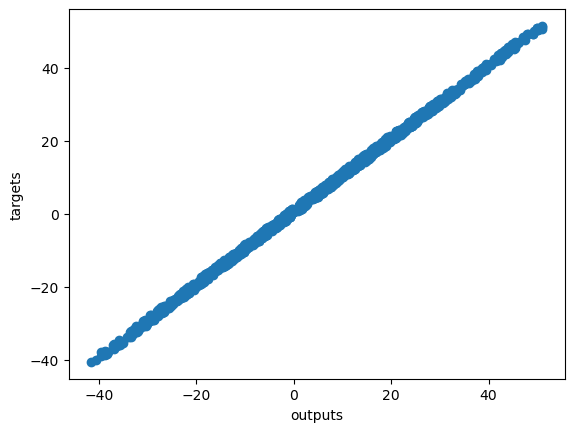

In [6]:
plt.scatter(outputs,targets)
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show